In [194]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import csv

In [140]:
df_user = pd.read_csv("u.user", engine='python', sep='|', names=["userID", "Age", "Gender", "occupation", "Zip-Code"])

In [141]:
df_user.head()

,userID,Age,Gender,occupation,Zip-Code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [142]:
df_movie = pd.read_csv("u.item", engine='python', sep='|', names=["movieID", "Movie title", "release date", "video release date",
              "IMDb URL", "unknown", "Action", "Adventure", "Animation",
              "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
              "Thriller", "War", "Western"])

In [143]:
df_movie.head()

,movieID,Movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [144]:
df_ratings = pd.read_csv("u.data", engine='python', sep='\t', names=["userID", "movieID", "Rating", "Timestamp"])

In [145]:
df_ratings.head()

,userID,movieID,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [146]:
df_merged1 = df_movie.merge(df_ratings, how='outer')

In [147]:
df_merged1.head()

,movieID,Movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userID,Rating,Timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,66,3,883601324


In [148]:
#Merging Users and Ratings
df_merged2 = df_user.merge(df_ratings, how='inner')

In [149]:
df_merged2.head()

,userID,Age,Gender,occupation,Zip-Code,movieID,Rating,Timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883


In [150]:
#Merging Users/Ratings/Movies 
df_merged3 = df_merged1.merge(df_merged2, how='inner')

In [151]:
df_merged3.head()

,movieID,Movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userID,Rating,Timestamp,Age,Gender,occupation,Zip-Code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,308,4,887736532,60,M,retired,95076
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,287,5,875334088,21,M,salesman,31211
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,148,4,877019411,33,M,engineer,97006
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,280,4,891700426,30,F,librarian,22903
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,66,3,883601324,23,M,student,80521


In [152]:
df_merged3 = df_merged3.fillna(0) 
df_merged3.UserID = df_merged3.userID.astype(int)
df_merged3.Rating = df_merged3.Rating.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [153]:
df_merged3.shape

(100000, 31)

In [154]:
df_merged3.sort_values(by=['userID'], ascending=True)

,movieID,Movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userID,Rating,Timestamp,Age,Gender,occupation,Zip-Code
5529,39,Strange Days (1995),01-Jan-1995,0.0,http://us.imdb.com/M/title-exact?Strange%20Day...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4,875072173,24,M,technician,85711
11183,82,Jurassic Park (1993),01-Jan-1993,0.0,http://us.imdb.com/M/title-exact?Jurassic%20Pa...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,5,878542589,24,M,technician,85711
1915,10,Richard III (1995),22-Jan-1996,0.0,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,3,875693118,24,M,technician,85711
23425,168,Monty Python and the Holy Grail (1974),01-Jan-1974,0.0,http://us.imdb.com/M/title-exact?Monty%20Pytho...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,874965478,24,M,technician,85711
6072,47,Ed Wood (1994),01-Jan-1994,0.0,http://us.imdb.com/M/title-exact?Ed%20Wood%20(...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4,875072125,24,M,technician,85711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,11,Seven (Se7en) (1995),01-Jan-1995,0.0,http://us.imdb.com/M/title-exact?Se7en%20(1995),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,943,4,888639000,22,M,student,77841
57812,415,"Apple Dumpling Gang, The (1975)",01-Jan-1975,0.0,http://us.imdb.com/M/title-exact?Apple%20Dumpl...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,943,1,888640027,22,M,student,77841
30525,201,Evil Dead II (1987),01-Jan-1987,0.0,http://us.imdb.com/M/title-exact?Evil%20Dead%2...,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,943,5,888639351,22,M,student,77841
54425,373,Judge Dredd (1995),01-Jan-1995,0.0,http://us.imdb.com/M/title-exact?Judge%20Dredd...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,943,3,888640275,22,M,student,77841


In [155]:
#Rearranging merged3 columns into suitable format
master_data = df_merged3[['userID', 'movieID', 'Movie title', 'Rating', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Zip-Code', 'Gender', 'Age', 'occupation', 'Timestamp']]

In [156]:
master_data.head()

,userID,movieID,Movie title,Rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Zip-Code,Gender,Age,occupation,Timestamp
0,308,1,Toy Story (1995),4,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,95076,M,60,retired,887736532
1,287,1,Toy Story (1995),5,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,31211,M,21,salesman,875334088
2,148,1,Toy Story (1995),4,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,97006,M,33,engineer,877019411
3,280,1,Toy Story (1995),4,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,22903,F,30,librarian,891700426
4,66,1,Toy Story (1995),3,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,80521,M,23,student,883601324


In [157]:
master_data.sort_values(by=['userID'], ascending=True)

,userID,movieID,Movie title,Rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Zip-Code,Gender,Age,occupation,Timestamp
5529,1,39,Strange Days (1995),4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,85711,M,24,technician,875072173
11183,1,82,Jurassic Park (1993),5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,85711,M,24,technician,878542589
1915,1,10,Richard III (1995),3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,85711,M,24,technician,875693118
23425,1,168,Monty Python and the Holy Grail (1974),5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,85711,M,24,technician,874965478
6072,1,47,Ed Wood (1994),4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,85711,M,24,technician,875072125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,943,11,Seven (Se7en) (1995),4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,77841,M,22,student,888639000
57812,943,415,"Apple Dumpling Gang, The (1975)",1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,77841,M,22,student,888640027
30525,943,201,Evil Dead II (1987),5,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,77841,M,22,student,888639351
54425,943,373,Judge Dredd (1995),3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,77841,M,22,student,888640275


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc294bd8110>]],
      dtype=object)

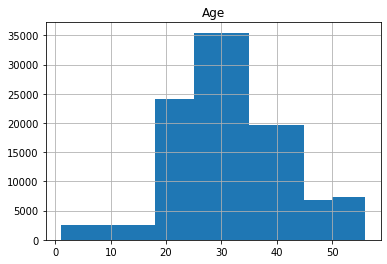

In [158]:
#PERFORMING EDAs
bins_list = [1, 18, 25, 35, 45, 50, 56]
master_data.hist(column='Age', bins = bins_list)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc28f75cd90>]],
      dtype=object)

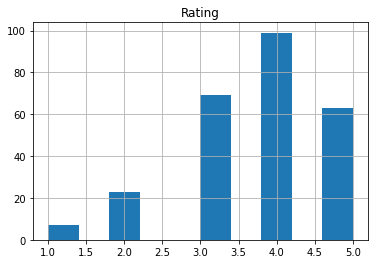

In [159]:
#Checking ratings on Jurassic Park
master_data[master_data['movieID'] == 82].hist(column='Rating')

In [160]:
#Avg rating of Jurassic park
master_data[master_data['movieID'] == 82].Rating.mean()

3.7203065134099615

In [161]:
#Predictive analysis
#Analysis factors affecting movie rating
master_data.head()
master_data['Gender'].replace(['F','M'],[0,1],inplace=True)
md_small = master_data.iloc[:, [1, 2, 3, 23, 24, 25, 26]]

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [162]:
md_small.head()

,movieID,Movie title,Rating,Zip-Code,Gender,Age,occupation
0,1,Toy Story (1995),4,95076,1,60,retired
1,1,Toy Story (1995),5,31211,1,21,salesman
2,1,Toy Story (1995),4,97006,1,33,engineer
3,1,Toy Story (1995),4,22903,0,30,librarian
4,1,Toy Story (1995),3,80521,1,23,student


In [163]:
#Convert as many dtypes into int to get better coef insights
md_small.dtypes

movieID         int64
Movie title    object
Rating          int64
Zip-Code       object
Gender          int64
Age             int64
occupation     object
dtype: object

In [164]:
#Finding coorelation coef
md_small[md_small.columns[1:]].corr()['Rating'][:]

Rating    1.000000
Gender   -0.000862
Age       0.054460
Name: Rating, dtype: float64

In [175]:
temp_genre = master_data.iloc[:, [4, 5, 6, 7, 8, 9 , 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]]

In [176]:
temp_genre.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [177]:
master_features = pd.merge(md_small, temp_genre, left_index=True, right_index=True)

In [178]:
master_features.head()

,movieID,Movie title,Rating,Zip-Code,Gender,Age,occupation,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),4,95076,1,60,retired,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),5,31211,1,21,salesman,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),4,97006,1,33,engineer,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),4,22903,0,30,librarian,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),3,80521,1,23,student,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [179]:
master_features.dtypes

movieID         int64
Movie title    object
Rating          int64
Zip-Code       object
Gender          int64
Age             int64
occupation     object
unknown         int64
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
dtype: object

In [182]:
#Preparing data for linear regression
#Drop all obj dtype
X_feature = md_small.drop(['Zip-Code', 'Movie title', 'occupation'], axis=1)

In [183]:
X_feature.head()

,movieID,Rating,Gender,Age
0,1,4,1,60
1,1,5,1,21
2,1,4,1,33
3,1,4,0,30
4,1,3,1,23


In [184]:
#Preparing to train on first 40 movies
X_feature_small = X_feature[X_feature['movieID'] < 40] 

In [186]:
X_feature_small_trimmed = X_feature_small.drop(['movieID','Rating'], axis=1)
X_feature_small_trimmed.head()

,Gender,Age
0,1,60
1,1,21
2,1,33
3,0,30
4,1,23


In [187]:
Y_target = master_features['Rating'][master_features['movieID']< 40]

In [189]:
x_train, x_test, y_train, y_test = train_test_split(X_feature_small_trimmed,Y_target,random_state=1)

In [191]:
logreg = LogisticRegression(max_iter=100000)

In [192]:
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [193]:
y_pred = logreg.predict(x_test)

In [195]:
metrics.accuracy_score(y_test,y_pred)

0.3533190578158458

In [196]:
print ('actual:    ', y_test.values[0:30])
print ('predicted: ', y_pred[0:30])

actual:     [5 2 4 5 5 5 3 4 4 4 2 4 5 3 5 4 1 3 3 1 4 4 4 4 2 5 5 4 4 3]
predicted:  [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
